In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [3]:
df = pd.read_csv('Предпочетаемые транспортные средства.csv')
df.head()

HTTPError: HTTP Error 401: Unauthorized

In [ ]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Favorite Transport     object
dtype: object

## Cleaning

In [ ]:
df.isna().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [ ]:
df['Income'].fillna(0.0)
df.head()

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro


In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

## Encoding

In [ ]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
fff = label_encoder.fit_transform(df['Gender'])
fff

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1])

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,0,NaN,bicycle
1,8,1,NaN,scooter
2,10,0,NaN,bicycle
3,14,1,NaN,metro
4,16,1,NaN,metro
5,18,0,NaN,metro
6,20,1,200.0,scooter
7,22,0,500.0,scooter


In [ ]:
df.dtypes

Age                     int64
Gender                  int64
Income                float64
Favorite Transport     object
dtype: object

## Model

In [ ]:
X = df.drop(columns='Favorite Transport')
X.head(3)

,Age,Gender,Income
0,5,0,NaN
1,8,1,NaN
2,10,0,NaN


In [ ]:
y = df['Favorite Transport']
y.head(3)

0    bicycle
1    scooter
2    bicycle
Name: Favorite Transport, dtype: object

In [ ]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
model.fit(X, y)

DecisionTreeClassifier()

## Prediction

In [ ]:
test_df = pd.DataFrame({
    'Age': [12, 30, 75],
    'Gender': [0, 0, 1],
    'Income': [0.0, 4000, 50000]
})
test_df

,Age,Gender,Income
0,12,0,0.0
1,30,0,4000.0
2,75,1,50000.0


In [ ]:
model.predict(test_df)

array(['scooter', 'car', 'helicopter'], dtype=object)

## Exporting to the DOT file

In [ ]:
tree.export_graphviz(model, out_file='decision_tree_model.dot', feature_names=['Age', 'Gender', 'Income'], filled=True, class_names=sorted(y.unique()))

## Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(26, 3)

In [ ]:
X_train.shape

(20, 3)

In [ ]:
X_test.shape

(6, 3)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X_test

,Age,Gender,Income
24,71,1,25000.0
19,57,1,4000.0
14,45,1,3000.0
10,27,0,3000.0
21,64,1,6500.0
17,53,0,1300.0


In [ ]:
predictions = model.predict(X_test)
predictions

array(['helicopter', 'car', 'taxi', 'taxi', 'helicopter', 'taxi'],
      dtype=object)

In [ ]:
model_accuracy_score = accuracy_score(y_test, predictions)
model_accuracy_score

0.6666666666666666

## Charts

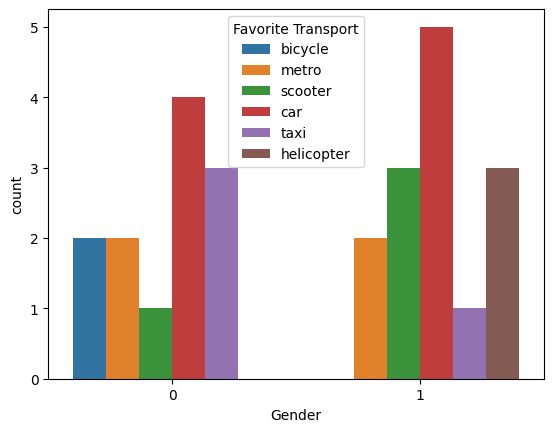

In [ ]:
sns.countplot(x=df['Gender'], hue=df['Favorite Transport'])
plt.show()

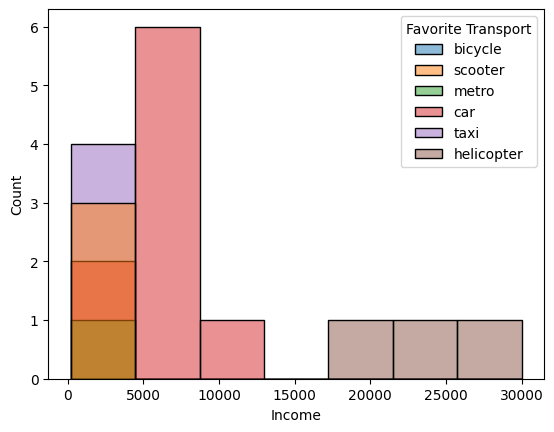

In [ ]:
sns.histplot(x=df['Income'], hue=df['Favorite Transport'])
plt.show()